In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report
from scipy import stats

%matplotlib inline


In [147]:
df=pd.read_csv('trainingData.csv')

In [148]:
df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [149]:
df.tail()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
39995,39996,Pusad,45,F,Muslim,Buffalo rearing,none,78000.0,4000.0,0,...,1.0,T2,2,600.0,1.0,1.0,Animal husbandry,12,12,8000.0
39996,39997,Pusad,35,F,ST,Tailoring,none,48000.0,4000.0,0,...,1.0,T2,4,800.0,1.0,1.0,Apparels,12,12,8000.0
39997,39998,Pusad,35,F,Sc,Goat rearing,none,48000.0,3500.0,0,...,1.0,T2,3,600.0,1.0,1.0,Meat Businesses,12,12,8000.0
39998,39999,Pusad,28,F,Sc,Goat rearing,none,48000.0,4000.0,0,...,1.0,T2,4,600.0,1.0,1.0,Meat Businesses,12,12,8000.0
39999,40000,Pusad,32,F,Sc,Goat rearing,none,72000.0,4500.0,0,...,1.0,T2,4,600.0,1.0,1.0,Meat Businesses,12,12,8000.0


In [150]:
df.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,40000.00000,40000.00000,4.000000e+04,39880.000000,40000.000000,40000.00000,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000,40000.000000,40000.000000,4.000000e+04
mean,20000.50000,55.15990,3.764021e+04,3810.875401,0.044900,1.13710,0.972489,26.641000,552.804750,0.686369,0.753216,12.032225,21.761175,8.412593e+03
std,11547.14972,3830.35566,2.873912e+04,4592.958009,0.222003,1.07384,0.163568,4749.995485,4596.921905,0.464028,0.255337,1.367473,16.682458,1.359694e+04
min,1.00000,2.00000,0.000000e+00,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10000.75000,29.00000,1.440000e+04,2500.000000,0.000000,0.00000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20000.50000,35.00000,3.600000e+04,3500.000000,0.000000,1.00000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30000.25000,42.00000,5.600000e+04,4000.000000,0.000000,2.00000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.00000,766105.00000,1.200000e+06,240000.000000,3.000000,7.00000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


In [151]:
df.dtypes

Id                         int64
city                      object
age                        int64
sex                       object
social_class              object
primary_business          object
secondary_business        object
annual_income            float64
monthly_expenses         float64
old_dependents             int64
young_dependents           int64
home_ownership           float64
type_of_house             object
occupants_count            int64
house_area               float64
sanitary_availability    float64
water_availabity         float64
loan_purpose              object
loan_tenure                int64
loan_installments          int64
loan_amount              float64
dtype: object

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40000 non-null  int64  
 1   city                   38136 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           34745 non-null  object 
 5   primary_business       39974 non-null  object 
 6   secondary_business     34759 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       39880 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         39621 non-null  float64
 12  type_of_house          39306 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa

In [153]:
df.isnull()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [154]:
financial_details_df = pd.DataFrame(df, columns=["primary_business", "secondary_business", "annual_income", "monthly_expenses", "old_dependents", "young_dependents"])
financial_details_df.head()
financial_details_df.describe()

,annual_income,monthly_expenses,old_dependents,young_dependents
count,4.000000e+04,39880.000000,40000.000000,40000.00000
mean,3.764021e+04,3810.875401,0.044900,1.13710
std,2.873912e+04,4592.958009,0.222003,1.07384
min,0.000000e+00,2.000000,0.000000,0.00000
25%,1.440000e+04,2500.000000,0.000000,0.00000
50%,3.600000e+04,3500.000000,0.000000,1.00000
75%,5.600000e+04,4000.000000,0.000000,2.00000
max,1.200000e+06,240000.000000,3.000000,7.00000


In [155]:
house_details_df=pd.DataFrame(df,columns=["home_ownership","type_of_house","occupants_count","house_area","sanitary_availability","water_availabity"])
house_details_df.head()
house_details_df.describe()

,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity
count,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000
mean,0.972489,26.641000,552.804750,0.686369,0.753216
std,0.163568,4749.995485,4596.921905,0.464028,0.255337
min,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,1.000000,2.000000,200.000000,0.000000,0.500000
50%,1.000000,3.000000,400.000000,1.000000,1.000000
75%,1.000000,4.000000,600.000000,1.000000,1.000000
max,1.000000,950000.000000,700000.000000,1.000000,1.000000


In [156]:
loan_details_df=pd.DataFrame(df,columns=["loan_purpose","loan_tenure","loan_installments","loan_amount"])
loan_details_df.head()
loan_details_df.describe()

,loan_tenure,loan_installments,loan_amount
count,40000.000000,40000.000000,4.000000e+04
mean,12.032225,21.761175,8.412593e+03
std,1.367473,16.682458,1.359694e+04
min,3.000000,0.000000,1.000000e+02
25%,12.000000,12.000000,5.000000e+03
50%,12.000000,12.000000,8.000000e+03
75%,12.000000,50.000000,1.000000e+04
max,84.000000,84.000000,1.343000e+06


In [157]:
loan_details_df.count()

loan_purpose         39974
loan_tenure          40000
loan_installments    40000
loan_amount          40000
dtype: int64

In [158]:
df_numeric = df.select_dtypes(include=[np.number])

                Id           age  annual_income  monthly_expenses  \
count  40000.00000   40000.00000   4.000000e+04      39880.000000   
mean   20000.50000      55.15990   3.764021e+04       3810.875401   
std    11547.14972    3830.35566   2.873912e+04       4592.958009   
min        1.00000       2.00000   0.000000e+00          2.000000   
25%    10000.75000      29.00000   1.440000e+04       2500.000000   
50%    20000.50000      35.00000   3.600000e+04       3500.000000   
75%    30000.25000      42.00000   5.600000e+04       4000.000000   
max    40000.00000  766105.00000   1.200000e+06     240000.000000   

       old_dependents  young_dependents  home_ownership  occupants_count  \
count    40000.000000       40000.00000    39621.000000     40000.000000   
mean         0.044900           1.13710        0.972489        26.641000   
std          0.222003           1.07384        0.163568      4749.995485   
min          0.000000           0.00000        0.000000         0.000000  

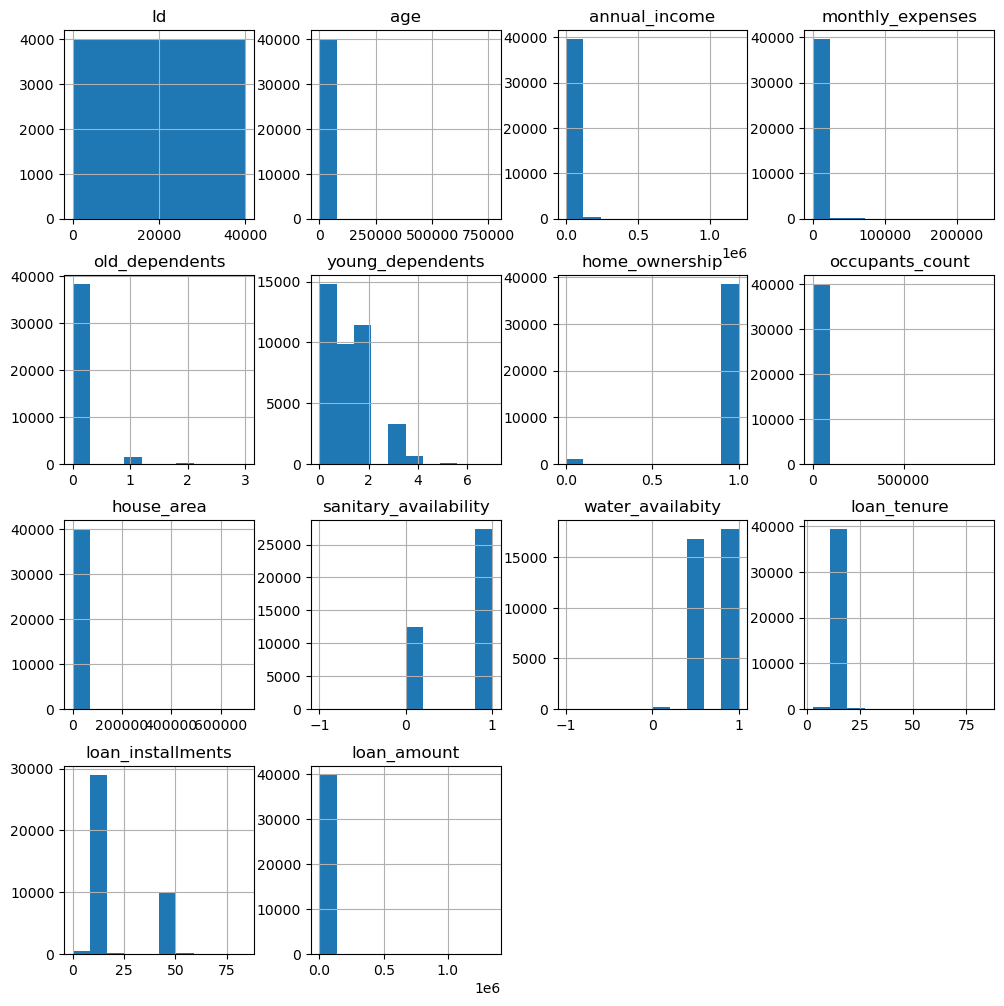

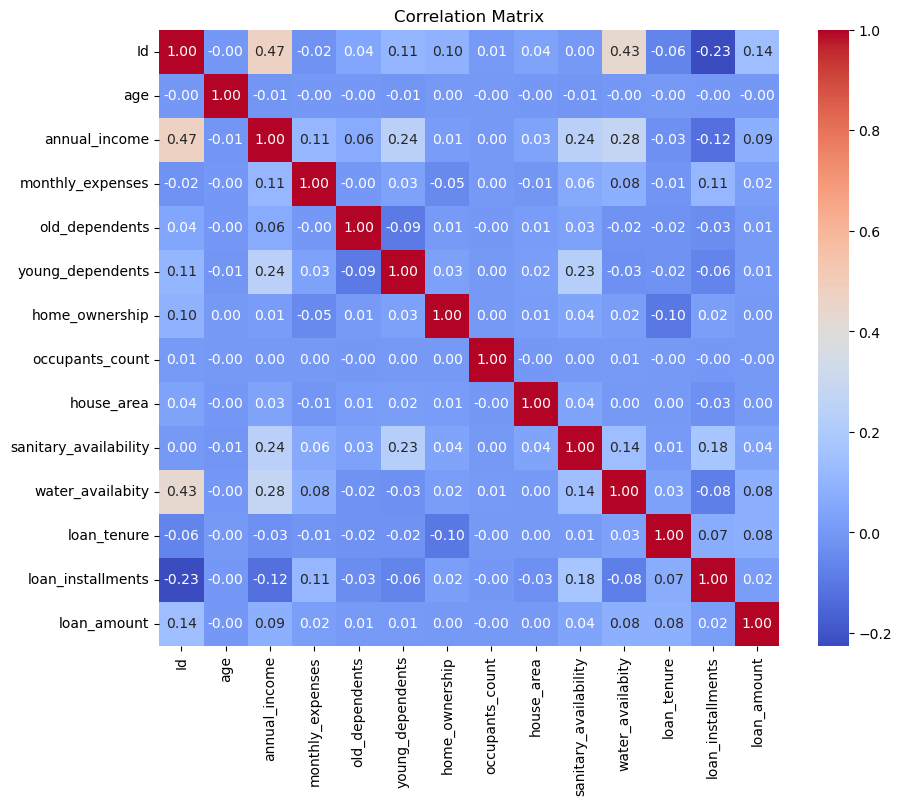

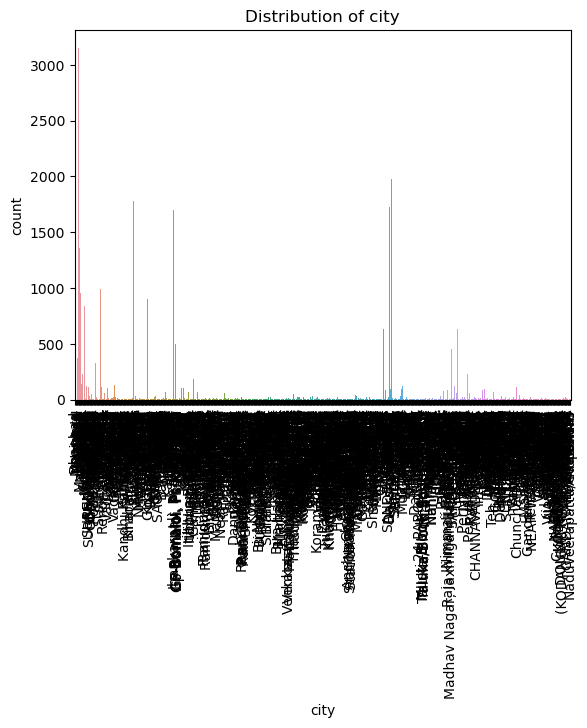

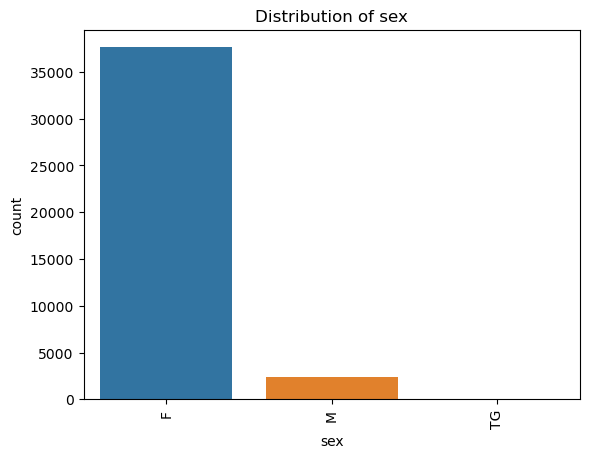

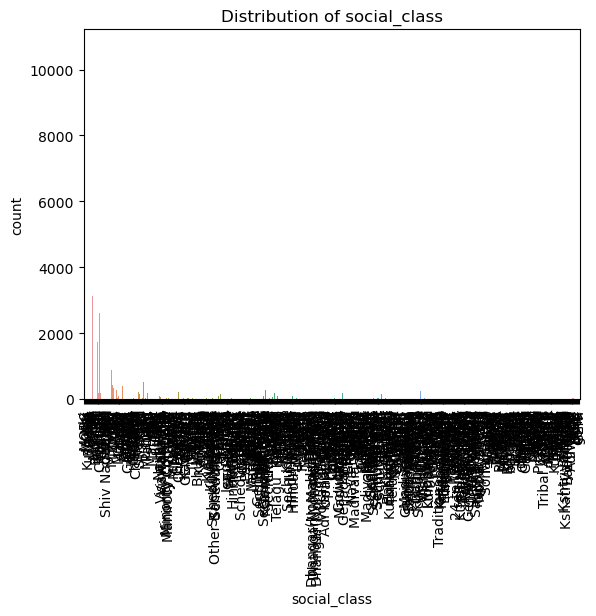

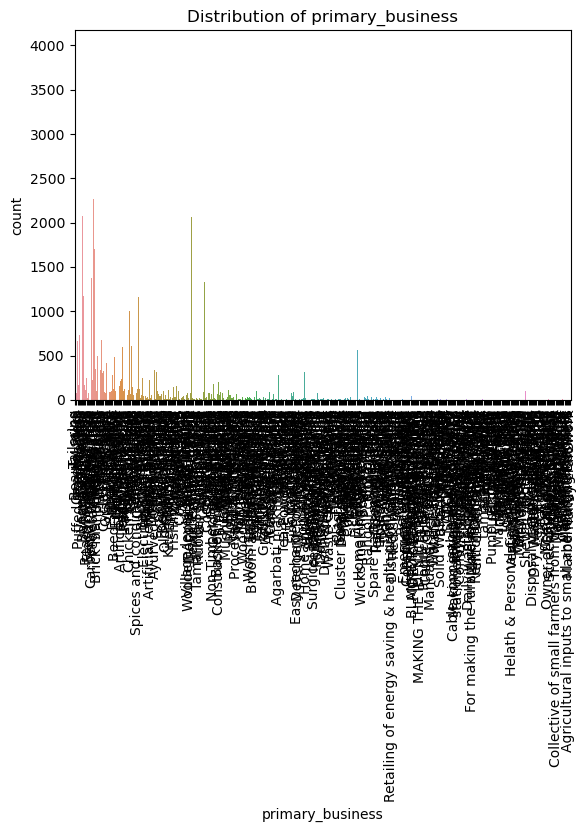

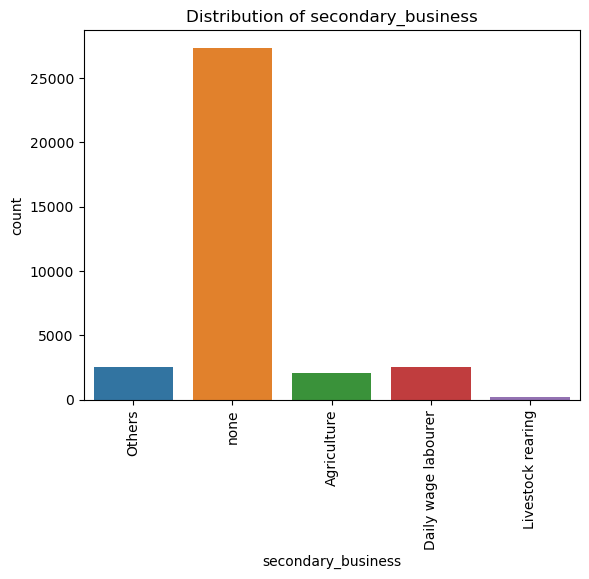

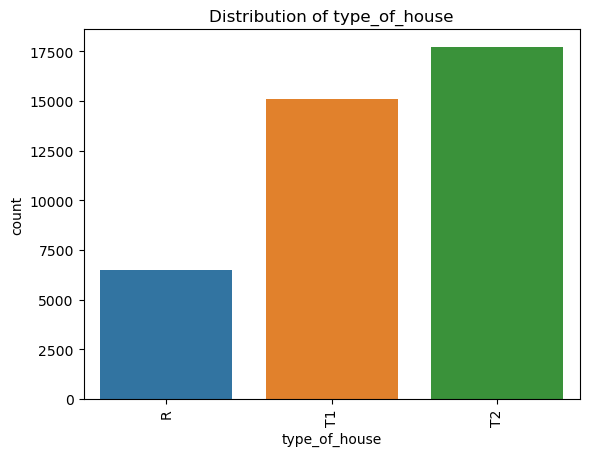

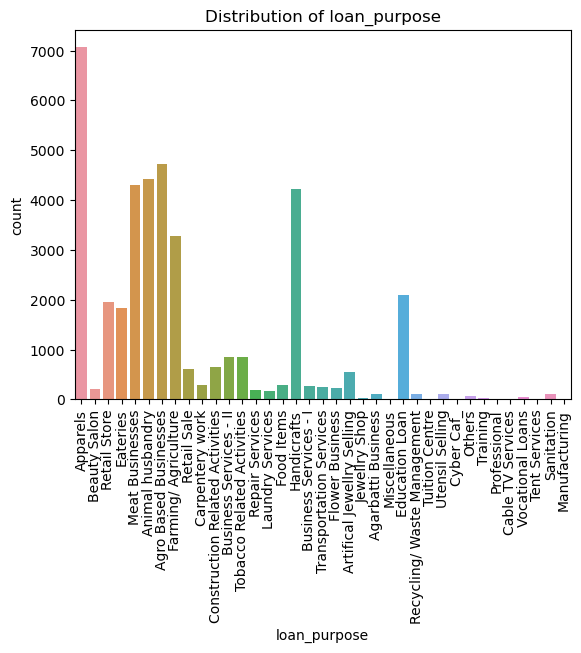

In [159]:
df = pd.read_csv('trainingData.csv')
numerical_summary = df.describe()
print(numerical_summary)
categorical_summary = df.describe(include=['object', 'category'])
print(categorical_summary)
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)
df.hist(figsize=(12, 12))
plt.show()
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
for col in df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()


In [160]:
print(df['loan_amount'].dtype)


float64


In [161]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
print(X_train_df.isna().sum().sum())  
print(y_train.isna().sum())          
print(X_test_df.isna().sum().sum())   
print(y_test.isna().sum())  

4297
0
1076
0


In [162]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [163]:
label_encoders = {}
categorical_columns = ['city', 'sex', 'social_class', 'primary_business', 'secondary_business',
                       'home_ownership', 'type_of_house', 'sanitary_availability', 'loan_purpose']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(['Id', 'loan_amount'], axis=1)
y = df['loan_amount']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

In [164]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_imputed, y_train)
rf_predictions = rf_reg.predict(X_test_imputed)


In [165]:
predicted_vs_actual = pd.DataFrame({
    'Actual': y_test,
    'Predicted': rf_predictions
})

print(predicted_vs_actual)


        Actual  Predicted
26915  14000.0    13577.0
37746   8000.0     8624.0
15211   7000.0     9550.0
8556    5000.0     5000.0
17307   8000.0     7370.0
...        ...        ...
12865   7000.0     8695.0
4436    5000.0     5155.0
23193  12000.0     8940.0
2142    5000.0     5000.0
23746   8000.0     8000.0

[8000 rows x 2 columns]


Full data with predictions saved to 'full_data_with_predictions1.csv'.


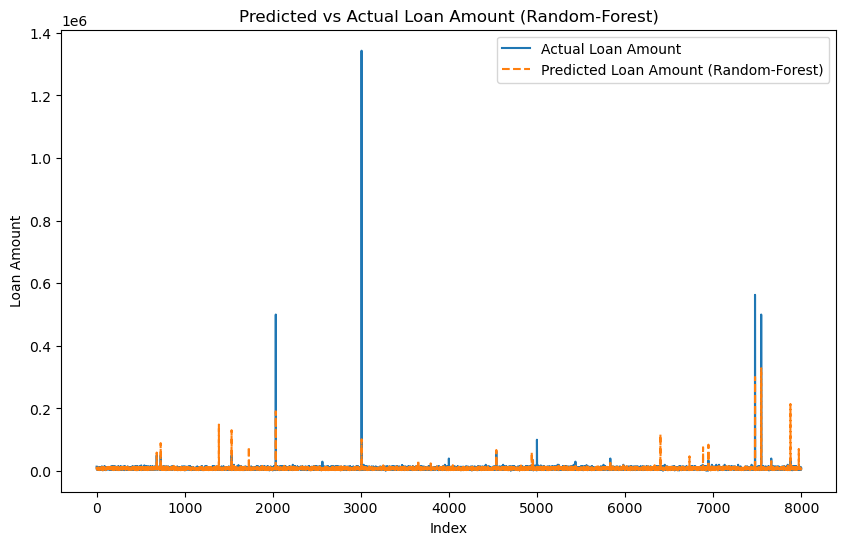

In [141]:
predicted_vs_actual = pd.DataFrame({
    'Predicted_loan_amount': rf_predictions,
    'Actual_loan_amount': y_test
}).reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(predicted_vs_actual['Actual_loan_amount'], label='Actual Loan Amount')
plt.plot(predicted_vs_actual['Predicted_loan_amount'], label='Predicted Loan Amount (Random-Forest)', linestyle='--')
plt.title('Predicted vs Actual Loan Amount (Random-Forest)')
plt.xlabel('Index')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()

In [142]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test,rf_predictions)
rf_mse = mean_squared_error(y_test , rf_predictions)

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R² Score: {rf_r2}")
print(f"Random Forest MAE:{rf_mae}")
print(f"Random Forest MSE:{rf_mse}")

Random Forest RMSE: 15242.07770097591
Random Forest R² Score: 0.3039974788209904
Random Forest MAE:1478.4179368777056
Random Forest MSE:232320932.64258707


In [173]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_imputed, y_train)
gb_predictions = gb_reg.predict(X_test_imputed)


In [174]:
predicted_vs_actual = pd.DataFrame({
    'Actual': y_test,
    'Predicted': gb_predictions
})

print(predicted_vs_actual)

        Actual    Predicted
32823   7000.0  8247.202161
16298   7500.0  8965.270506
28505   8000.0  9540.542177
6689    7500.0  7594.751990
26893  15000.0  9724.359579
...        ...          ...
13618   5000.0  8075.801894
35165   8000.0  9034.827580
16359   8000.0  6798.798365
3842    5000.0  7156.803265
37682   8000.0  9034.827580

[8000 rows x 2 columns]


In [181]:
df = pd.read_csv('trainingData.csv')

df_test = df.loc[test_indices].copy()
df_test['Predicted_loan_amount'] = gb_predictions
df_test['Actual_loan_amount'] = y_test.reset_index(drop=True)

df_test.to_csv('full_data_with_predictions_final1.csv', index=False)
print("Full data with predictions saved to 'full_data_with_predictions_final1.csv'.")


Full data with predictions saved to 'full_data_with_predictions_final1.csv'.


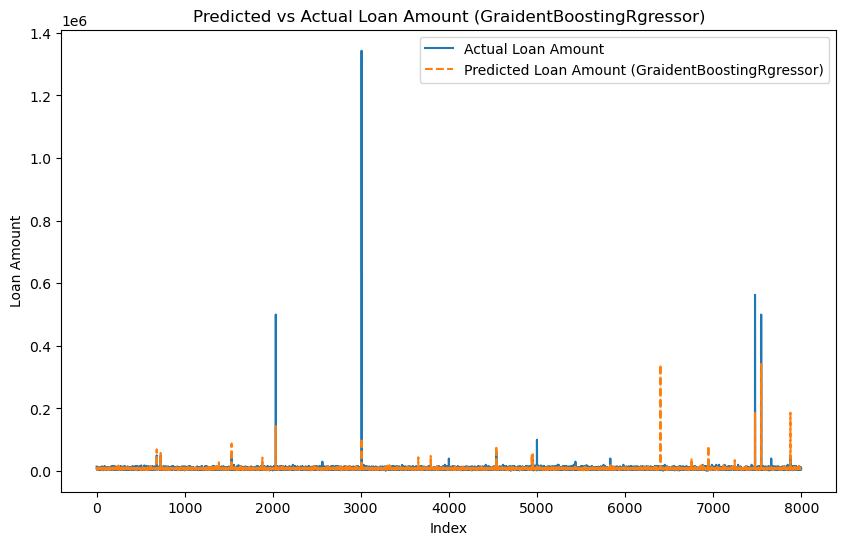

In [99]:
predicted_vs_actual = pd.DataFrame({
    'Predicted_loan_amount': gb_predictions,
    'Actual_loan_amount': y_test
}).reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(predicted_vs_actual['Actual_loan_amount'], label='Actual Loan Amount')
plt.plot(predicted_vs_actual['Predicted_loan_amount'], label='Predicted Loan Amount (GraidentBoostingRgressor)', linestyle='--')
plt.title('Predicted vs Actual Loan Amount (GraidentBoostingRgressor)')
plt.xlabel('Index')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()

In [100]:
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_r2 = r2_score(y_test, gb_predictions)
print(f"Gradient Boosting RMSE: {gb_rmse}")
print(f"Gradient Boosting R² Score: {gb_r2}")

Gradient Boosting RMSE: 15911.457275644454
Gradient Boosting R² Score: 0.2415230549931624


In [102]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_imputed, y_train)
log_reg_predictions = log_reg.predict(X_test_imputed)
accuracy = accuracy_score(y_test, log_reg_predictions)
conf_matrix = confusion_matrix(y_test, log_reg_predictions)
class_report = classification_report(y_test, log_reg_predictions)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


/Users/nishantarora/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Accuracy: 0.453625
Confusion Matrix:
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

      1000.0       0.00      0.00      0.00         5
      2000.0       0.00      0.00      0.00         9
      2500.0       1.00      1.00      1.00        12
      3000.0       0.00      0.00      0.00       150
      3300.0       0.00      0.00      0.00         3
      3500.0       0.00      0.00      0.00         2
      4000.0       0.00      0.00      0.00        25
      4500.0       0.00      0.00      0.00         2
      5000.0       0.51      0.76      0.61      2443
      5300.0       0.00      0.00      0.00         1
      5600.0       0.00      0.00      0.00         1
      6000.0       0.77      0.57      0.66       126
      6300.0       0.00      0.00      0.00         2
      6500.0       0.00    

/Users/nishantarora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nishantarora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nishantarora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nishanta

In [103]:
predicted_vs_actual = pd.DataFrame({
    'Actual': y_test,
    'Predicted': log_reg_predictions
})

print(predicted_vs_actual)

        Actual  Predicted
26915  14000.0    12000.0
37746   8000.0     8000.0
15211   7000.0     8000.0
8556    5000.0     5000.0
17307   8000.0     5000.0
...        ...        ...
12865   7000.0     8000.0
4436    5000.0     7500.0
23193  12000.0     5000.0
2142    5000.0     5000.0
23746   8000.0     8000.0

[8000 rows x 2 columns]


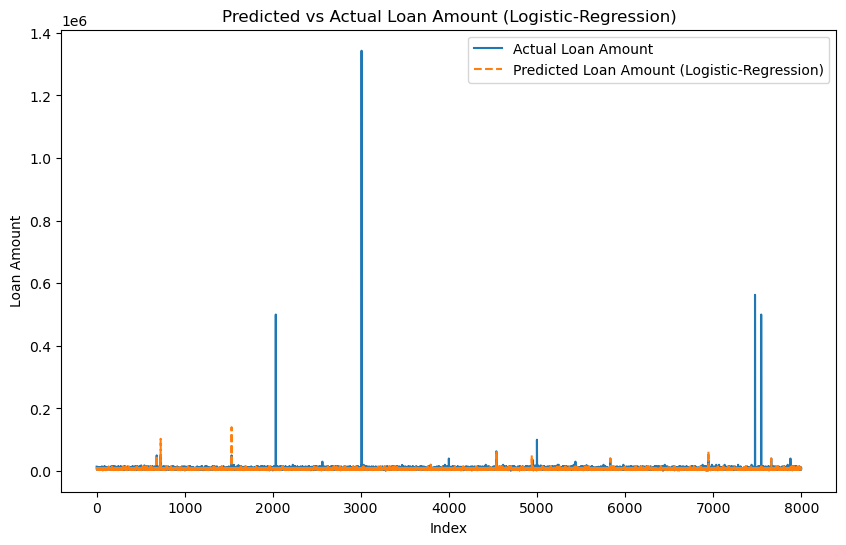

In [104]:
predicted_vs_actual = pd.DataFrame({
    'Predicted_loan_amount': log_reg_predictions,
    'Actual_loan_amount': y_test
}).reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(predicted_vs_actual['Actual_loan_amount'], label='Actual Loan Amount')
plt.plot(predicted_vs_actual['Predicted_loan_amount'], label='Predicted Loan Amount (Logistic-Regression)', linestyle='--')
plt.title('Predicted vs Actual Loan Amount (Logistic-Regression)')
plt.xlabel('Index')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()

In [106]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


/Users/nishantarora/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [107]:
predicted_vs_actual = pd.DataFrame({
    'Actual': y_test,
    'Predicted': lin_reg_predictions
})

print(predicted_vs_actual)

        Actual     Predicted
26915  14000.0   8932.132160
37746   8000.0   8224.416742
15211   7000.0  10460.229987
8556    5000.0   7058.974149
17307   8000.0   7671.430826
...        ...           ...
12865   7000.0   9609.608901
4436    5000.0   9074.173233
23193  12000.0   7025.490194
2142    5000.0   6085.891190
23746   8000.0   6969.962320

[8000 rows x 2 columns]


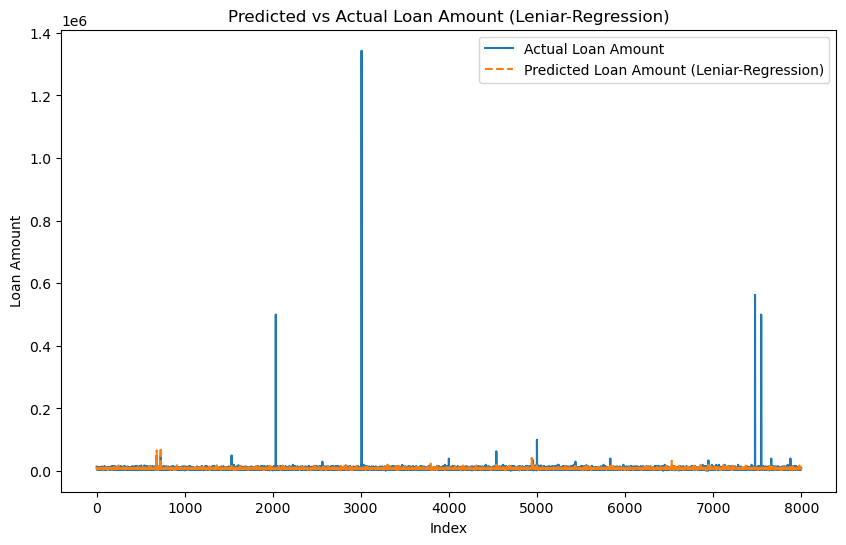

In [108]:
predicted_vs_actual = pd.DataFrame({
    'Predicted_loan_amount': lin_reg_predictions,
    'Actual_loan_amount': y_test
}).reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(predicted_vs_actual['Actual_loan_amount'], label='Actual Loan Amount')
plt.plot(predicted_vs_actual['Predicted_loan_amount'], label='Predicted Loan Amount (Leniar-Regression)', linestyle='--')
plt.title('Predicted vs Actual Loan Amount (Leniar-Regression)')
plt.xlabel('Index')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()